In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
# Provide the path to your dataset
file_path = "./data/zomato_df_final_data.csv"

# Load the dataset
zomato_df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(zomato_df.head())

                                             address   cost  \
0                      371A Pitt Street, CBD, Sydney   50.0   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   
3   Sydney Opera House, Bennelong Point, Circular...  270.0   
4              20 Campbell Street, Chinatown, Sydney   55.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   
2                                 ['Japanese'] -33.867971   
3                        ['Modern Australian'] -33.856784   
4                            ['Thai', 'Salad'] -33.879035   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmo

# Part A –Importing and Understanding Data
# Question 1

C:\Users\bbhat\AppData\Local\Temp\ipykernel_5384\2212602235.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index, palette="viridis")


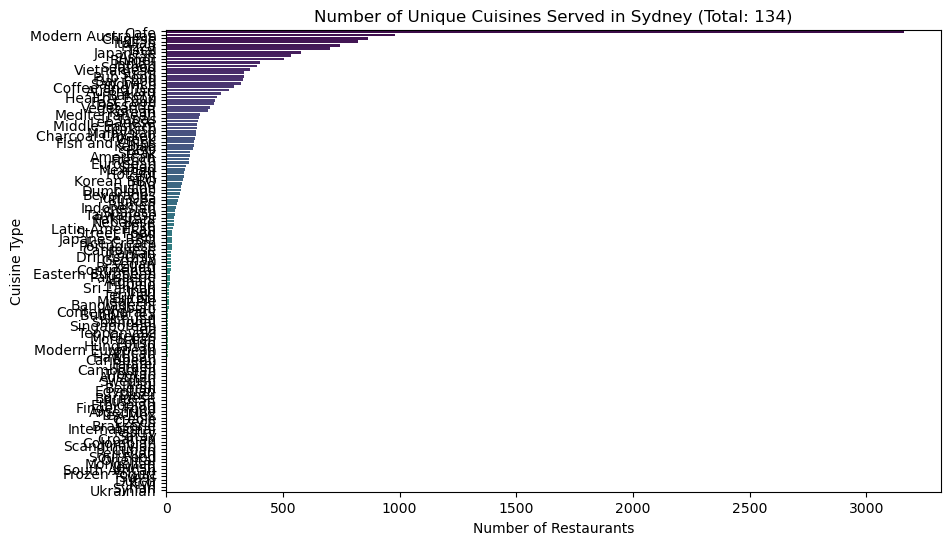

In [13]:
#Unique Cuisines in Sydney Restaurants
# Extract the 'cuisine' column and count unique cuisines
zomato_df['cuisine'] = zomato_df['cuisine'].apply(lambda x: eval(x))  # Convert string list to actual list
unique_cuisines = zomato_df['cuisine'].explode().nunique()

# Plot the count of unique cuisines
cuisine_counts = zomato_df['cuisine'].explode().value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index, palette="viridis")
plt.title(f"Number of Unique Cuisines Served in Sydney (Total: {unique_cuisines})")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine Type")
plt.show()


C:\Users\bbhat\AppData\Local\Temp\ipykernel_5384\1617463490.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_suburbs.index, y=top_suburbs.values, palette="Blues_r")


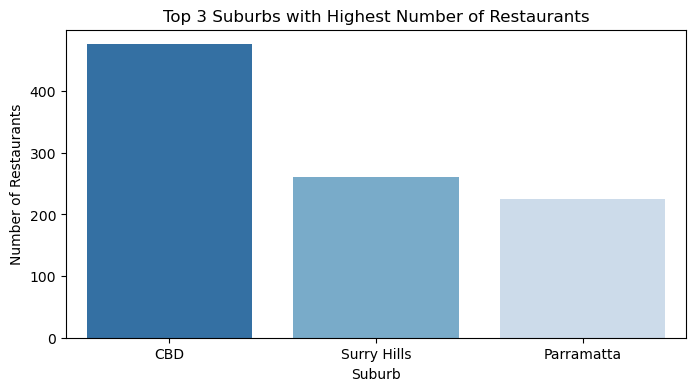

In [15]:
#Top 3 Suburbs with the Highest Number of Restaurants
# Count the number of restaurants per suburb
top_suburbs = zomato_df['subzone'].value_counts().head(3)

# Plot the top 3 suburbs
plt.figure(figsize=(8,4))
sns.barplot(x=top_suburbs.index, y=top_suburbs.values, palette="Blues_r")
plt.title("Top 3 Suburbs with Highest Number of Restaurants")
plt.xlabel("Suburb")
plt.ylabel("Number of Restaurants")
plt.show()


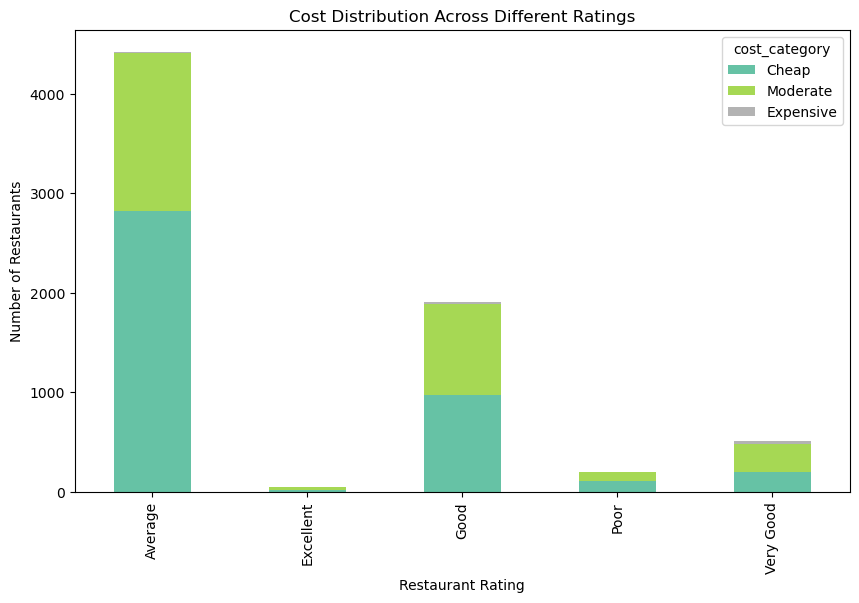

              count        mean         std   min   25%   50%    75%    max
rating_text                                                                
Average      4420.0   51.021267   22.831674  10.0  35.0  45.0   60.0  200.0
Excellent      51.0  101.666667  113.215134  20.0  40.0  60.0  120.0  500.0
Good         1903.0   59.528114   29.533156  10.0  40.0  50.0   70.0  370.0
Poor          201.0   55.845771   23.738810  20.0  40.0  50.0   70.0  180.0
Very Good     506.0   71.515810   44.030286  15.0  45.0  60.0   80.0  300.0


In [17]:
#Relation Between Ratings and Cost
# Filter data for relevant columns
rating_vs_cost = zomato_df[['cost', 'rating_text']].dropna()

# Create categories for cost (cheap, moderate, expensive)
rating_vs_cost['cost_category'] = pd.cut(rating_vs_cost['cost'], 
                                         bins=[0, 50, 150, float('inf')], 
                                         labels=['Cheap', 'Moderate', 'Expensive'])

# Create a stacked bar chart showing cost distribution for different ratings
cost_rating_crosstab = pd.crosstab(rating_vs_cost['rating_text'], rating_vs_cost['cost_category'])

cost_rating_crosstab.plot(kind='bar', stacked=True, figsize=(10,6), colormap="Set2")
plt.title("Cost Distribution Across Different Ratings")
plt.xlabel("Restaurant Rating")
plt.ylabel("Number of Restaurants")
plt.show()

# Analyze the relationship
rating_cost_summary = rating_vs_cost.groupby('rating_text')['cost'].describe()
print(rating_cost_summary)


#### Conclusion for the Third Question

After generating the visual for the relation between rating_text and cost, interpret the results. For example:

"Restaurants with 'Excellent' ratings are mostly costly while those with 'Poor' ratings are rarely expensive."
Check whether the visual (stacked bar chart) supports this statement by reviewing how many "Excellent" restaurants fall into the "Expensive" category and how many "Poor" restaurants fall into the "Cheap" or "Moderate" categories.

# Part A –Importing and Understanding Data
# Question 2

## Exploratory Data Analysis on 'Cost'
#### Histogram and Descriptive Statistics for Cost

Cost Summary:
 count    10154.000000
mean        51.153240
std         27.799485
min          8.000000
25%         30.000000
50%         45.000000
75%         60.000000
max        500.000000
Name: cost, dtype: float64


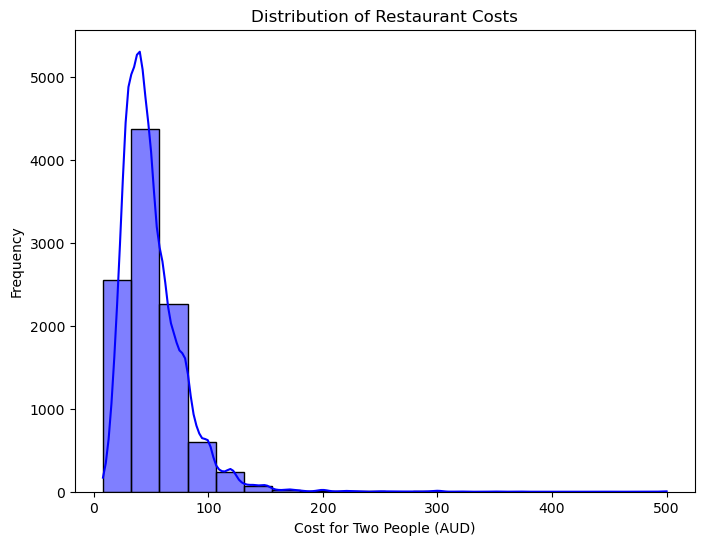

In [21]:
# Descriptive statistics for cost
cost_summary = zomato_df['cost'].describe()
print("Cost Summary:\n", cost_summary)

# Histogram for cost
plt.figure(figsize=(8,6))
sns.histplot(zomato_df['cost'].dropna(), bins=20, kde=True, color='blue')
plt.title('Distribution of Restaurant Costs')
plt.xlabel('Cost for Two People (AUD)')
plt.ylabel('Frequency')
plt.show()


#### Insights for 'Cost':
The mean, median, and standard deviation will give you an idea of the central tendency and dispersion of the cost data.
The histogram shows the distribution of restaurant costs. For example, are most restaurants inexpensive, or are there many high-end places?

## Exploratory Data Analysis on 'Rating'
#### Distribution Plot and Descriptive Statistics for Rating

Rating Summary:
 count    7184.000000
mean        3.283672
std         0.454580
min         1.800000
25%         3.000000
50%         3.300000
75%         3.600000
max         4.900000
Name: rating_number, dtype: float64


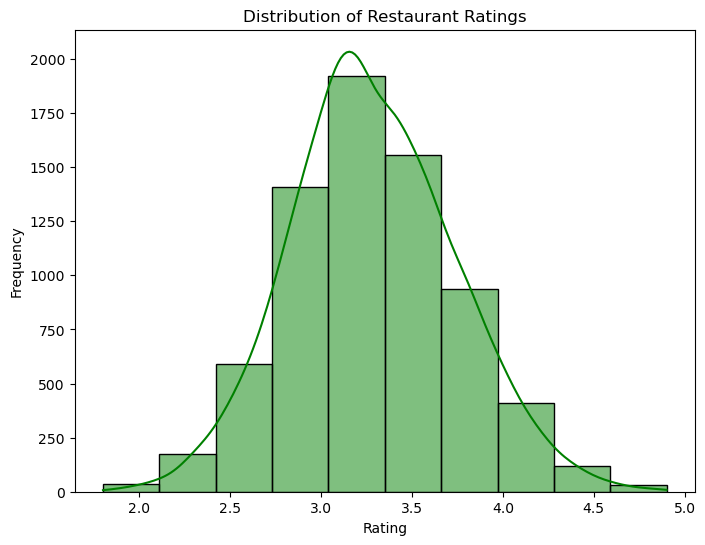

In [22]:
# Descriptive statistics for rating
rating_summary = zomato_df['rating_number'].describe()
print("Rating Summary:\n", rating_summary)

# Distribution plot for rating
plt.figure(figsize=(8,6))
sns.histplot(zomato_df['rating_number'].dropna(), bins=10, kde=True, color='green')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


#### Insights for 'Rating':
The rating distribution will show how ratings are spread across the restaurants, e.g., are most restaurants rated "Very Good" or "Excellent"?
Analyze the mean, min, max, and quartiles to get a clearer picture of how restaurants are rated.

# Exploratory Data Analysis on 'Type'
#### Bar Plot for Business Type
Since 'Type' is a categorical variable, We can visualize its distribution using a bar plot:

C:\Users\bbhat\AppData\Local\Temp\ipykernel_5384\21954656.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.values, y=type_counts.index, palette='coolwarm')


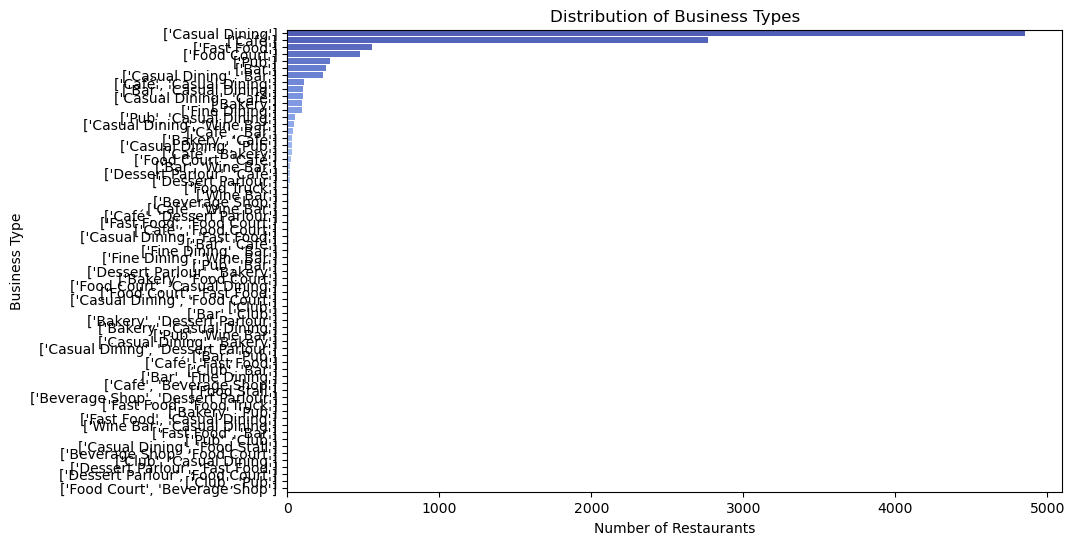

In [23]:
# Extract the types of business
type_counts = zomato_df['type'].explode().value_counts()

# Bar plot for business type
plt.figure(figsize=(10,6))
sns.barplot(x=type_counts.values, y=type_counts.index, palette='coolwarm')
plt.title('Distribution of Business Types')
plt.xlabel('Number of Restaurants')
plt.ylabel('Business Type')
plt.show()


## Insights for 'Type':
The bar plot will give you an idea of which types of restaurants (e.g., "Casual Dining", "Fine Dining", etc.) are most prevalent in the dataset.
Use this information to determine the diversity of restaurant business types in Sydney.

## Summary of the Descriptive Insights
For each variable:

Cost: Identify typical price ranges and whether the cost distribution is skewed towards cheaper or more expensive options.

Rating: Observe the most common ratings and whether restaurants tend to be highly rated or fall in the middle.

Type: Understand which types of dining experiences (e.g., Casual, Fine Dining) dominate the market.

## Conclusion

The exploratory analysis using histograms, distribution plots, and bar plots allows us to understand the dataset's key characteristics.
These insights will help guide further analysis and predictive modeling tasks.

### 3. Produce Cuisine Density Map

In [26]:
# Load the geojson file
sydney_geojson_path = "./data/sydney.geojson"
sydney_geo = gpd.read_file(sydney_geojson_path)

# Load the restaurant dataset
zomato_df = pd.read_csv(r"C:\Users\bbhat\OneDrive\Desktop\Data Science Technology and Systems PG\ASSIGNMENT (I)\zomato_df_final_data.csv")

# Convert 'lat' and 'lng' columns into a GeoDataFrame
gdf = gpd.GeoDataFrame(zomato_df, geometry=gpd.points_from_xy(zomato_df.lng, zomato_df.lat))

def show_cuisine_densitymap(cuisine_name):
    """
    Function to display a density map of a specific cuisine type across Sydney.
    Args:
        cuisine_name (str): The cuisine to show on the map.
    """
    # Filter for the specific cuisine
    zomato_df['cuisine'] = zomato_df['cuisine'].apply(lambda x: eval(x))  # Convert string list to actual list
    cuisine_df = zomato_df[zomato_df['cuisine'].apply(lambda x: cuisine_name in x)]
    
    # Convert to GeoDataFrame with restaurant points
    cuisine_gdf = gpd.GeoDataFrame(cuisine_df, geometry=gpd.points_from_xy(cuisine_df.lng, cuisine_df.lat))
    
    # Spatial join between restaurants and suburbs
    cuisine_in_suburbs = gpd.sjoin(sydney_geo, cuisine_gdf, how="left", op='contains')
    
    # Count the number of restaurants serving this cuisine in each suburb
    cuisine_counts = cuisine_in_suburbs.groupby('subzone').size().reset_index(name='count')
    
    # Merge counts back with the original Sydney geo dataframe
    sydney_geo_merged = sydney_geo.merge(cuisine_counts, how="left", left_on="subzone", right_on="subzone")
    
    # Plot the map
    plt.figure(figsize=(10, 8))
    sydney_geo_merged.plot(column='count', cmap='OrRd', legend=True, 
                           legend_kwds={'label': f'Number of {cuisine_name} Restaurants', 'orientation': "horizontal"})
    plt.title(f'{cuisine_name} Cuisine Density Map')
    plt.axis('off')
    plt.show()

# Example usage:
show_cuisine_densitymap('Chinese')


NameError: name 'gpd' is not defined